Lasso Regression

In [103]:
#Importing the necessary packages

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV

%matplotlib inline

In [104]:
def fcnCreateDataset(intSamples, intFeatures, intNonZeroFeatures):
    indexList = np.random.permutation(intFeatures + 1)
    betaTrue = np.zeros(intFeatures + 1)
    betaTrue[indexList[0:intNonZeroFeatures]] = 5 * np.random.randn(intNonZeroFeatures)
    x = np.random.randn(intSamples, intFeatures)    
    return x, betaTrue    

In [105]:
def fcnAddBias(x):
    return np.hstack((np.ones(len(x))[:,np.newaxis],x))

In [106]:
def fcnClipFunctionForProximalGradient(intBeta, intAlpha):
    intClip = np.minimum(intBeta, intAlpha)
    intClip = np.maximum(intClip, -intAlpha)
    return intClip

def fcnProximalL1Norm(betaHat, intAlpha, blnPenalizeAll = True):
    Out = betaHat - fcnClipFunctionForProximalGradient(betaHat,intAlpha)
    if not blnPenalizeAll:
        Out[0] = betaHat[0]
    return Out

In [134]:
def fcnCostFunctionRegularisedMSE(x, y, b, lda):
    m = len(x)
    j = (1/(2*m)) * np.sum((y - np.dot(x,b))**2) + (lda/(2*m)) * np.sum(np.abs(b))
    return j

def fcnCalculateWeightUsingProximalGradient(x, y, intLambda = 10 , intAlpha = 0.001, intMaxIterations = 1000):
    if len(x.shape) == 1:
        x = x[:,np.newaxis]
    if len(y.shape) == 1:
        y = y[:,np.newaxis]
    x = fcnAddBias(x)
    intNumberOfSamples = x.shape[0]
    beta = np.zeros(x.shape[1])
    beta = beta[:,np.newaxis]
    CostFunctionValue = np.zeros(intMaxIterations)
    for i in range(0, intMaxIterations):
        Gradient = np.dot(x.T,np.dot(x, beta) - y)
        beta = fcnProximalL1Norm(beta - intAlpha*Gradient, intAlpha * intLambda, False)
        CostFunctionValue[i] = fcnCostFunctionRegularisedMSE(x, y, beta, intLambda)
    return beta, CostFunctionValue

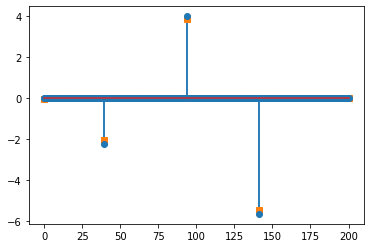

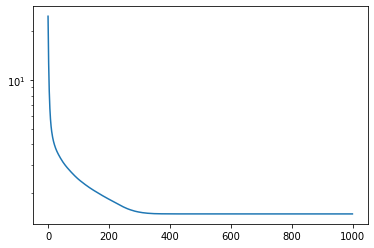

In [178]:
x,betaTrue = fcnCreateDataset(40, 200, 3)
noise = 0.001 * np.random.randn(40)
y = fcnAddBias(x) @ betaTrue + noise

beta, CostFunctionValue = fcnCalculateWeightUsingProximalGradient(x,y)

plt.figure()
plt.stem(beta, markerfmt = 'C1s', use_line_collection = True)
plt.stem(betaTrue, use_line_collection = True)

plt.figure()
plt.semilogy(CostFunctionValue)

In [182]:
#Prediction and Error Metrics calculation

def fcnCalculateMSE(YActual, YPredicted):
    sum_error = 0.0
    for i in range(len(YActual)):
        prediction_error = YActual[i] - YPredicted[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(YActual))
    return mean_error

def fcnPredict(x,weight):
    return np.dot(x,weight)

def fcnCalculateSSE(yActual, yPredicted):
    return np.sum((yActual - yPredicted) ** 2)

def fcnCalculateSST(yActual, yPredicted):
    return np.sum((yPredicted - np.mean(yActual)) ** 2)

def fcnCalculateR(yActual, yPredicted):
    return 1 - (fcnCalculateSSE(yActual, yPredicted)/fcnCalculateSST(yActual, yPredicted))
    

In [137]:
data = pd.read_csv("mpg_data.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,category,carname
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,low,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,Medium,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,low,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,low,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,low,ford galaxie 500


In [138]:
#Extracting the numerical features from pd to np

col = data.columns
we = data.to_numpy()
we = we[:,0:8]
we = we.astype(np.float64)
we

array([[ 15. ,   8. , 350. , ...,  11.5,  70. ,   1. ],
       [ 18. ,   8. , 318. , ...,  11. ,  70. ,   1. ],
       [ 16. ,   8. , 304. , ...,  12. ,  70. ,   1. ],
       ...,
       [ 28. ,   4. , 120. , ...,  18.6,  82. ,   1. ],
       [ 31. ,   4. , 119. , ...,  19.4,  82. ,   1. ],
       [ 18. ,   8. , 307. , ...,  12. ,  70. ,   1. ]])

In [139]:
#Splitting the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = we[:,1:]
y = we[:,0]
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [140]:
#Analysing the parameters using different methods

[[23.47094511]
 [ 0.        ]
 [ 0.56047553]
 [-0.41875121]
 [-5.3455631 ]
 [ 0.1651213 ]
 [ 2.61400141]
 [ 0.91145165]]


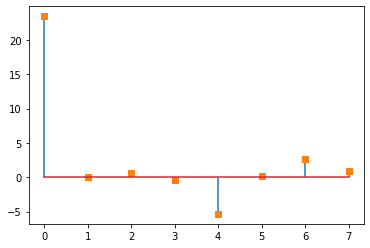

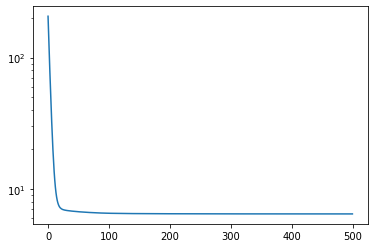

In [208]:
weight, CostValue = fcnCalculateWeightUsingProximalGradient(x_train, y_train, 10, 0.0005, 500)

print(weight)

plt.figure()
plt.stem(weight, markerfmt = 'C1s', use_line_collection = True)

plt.figure()
plt.semilogy(CostValue)

The weight vector : [-0.24864771  1.65212607 -0.63135813 -5.86911091  0.2491887   2.65955398
  1.04334546] and intercept is : 23.46624391093721


<StemContainer object of 3 artists>

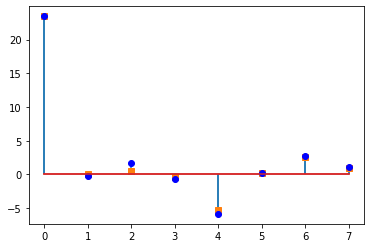

In [209]:
lasso_model = Lasso(alpha = 0.0005)
lasso_model.fit(x_train, y_train)

print("The weight vector : {} and intercept is : {}".format(lasso_model.coef_, lasso_model.intercept_))

w = lasso_model.coef_
w = np.insert(w, 0, lasso_model.intercept_, axis = 0)
w = w[:, np.newaxis]

plt.figure()
plt.stem(weight, markerfmt = 'C1s', use_line_collection = True)
plt.stem(w, markerfmt = 'bo', use_line_collection = True)

In [210]:
#Executing the model and calculating the error

yPredicted = fcnPredict(fcnAddBias(x_train),weight)
yPredicted_test = fcnPredict(fcnAddBias(x_test), weight)
SSE = fcnCalculateSSE(y_test[:,np.newaxis], yPredicted_test)
SST = fcnCalculateSST(y_test[:,np.newaxis], yPredicted_test)
R2 = fcnCalculateR(y_test[:,np.newaxis], yPredicted_test)

In [211]:
print("Train Error: {}".format(fcnCalculateMSE(y_train, yPredicted)))
print("Test Error: {}".format(fcnCalculateMSE(y_test, yPredicted_test)))
print("SSE: {}, SST: {}, R2: {}".format(SSE, SST, R2))

Train Error: [11.83144867]
Test Error: [7.6595116]
SSE: 605.1014160177896, SST: 3811.1727849778613, R2: 0.8412296030232844


In [212]:
#Executing the model and calculating the error

yPredicted3 = fcnPredict(fcnAddBias(x_train),w)
yPredicted_test3 = fcnPredict(fcnAddBias(x_test), w)
SSE = fcnCalculateSSE(y_test[:,np.newaxis], yPredicted_test3)
SST = fcnCalculateSST(y_test[:,np.newaxis], yPredicted_test3)
R2 = fcnCalculateR(y_test[:,np.newaxis], yPredicted_test3)

print("Train Error: {}".format(fcnCalculateMSE(y_train, yPredicted3)))
print("Test Error: {}".format(fcnCalculateMSE(y_test, yPredicted_test3)))
print("SSE: {}, SST: {}, R2: {}".format(SSE, SST, R2))

Train Error: [11.76287554]
Test Error: [7.58074965]
SSE: 598.8792222176628, SST: 3872.531847204116, R2: 0.8453520214042809


In [213]:
alphas = 10**np.linspace(10,-2,100)*0.5
lassocv = LassoCV(alphas = alphas, normalize = True)
lassocv.fit(x_train, y_train)
lassocv.alpha_

0.005

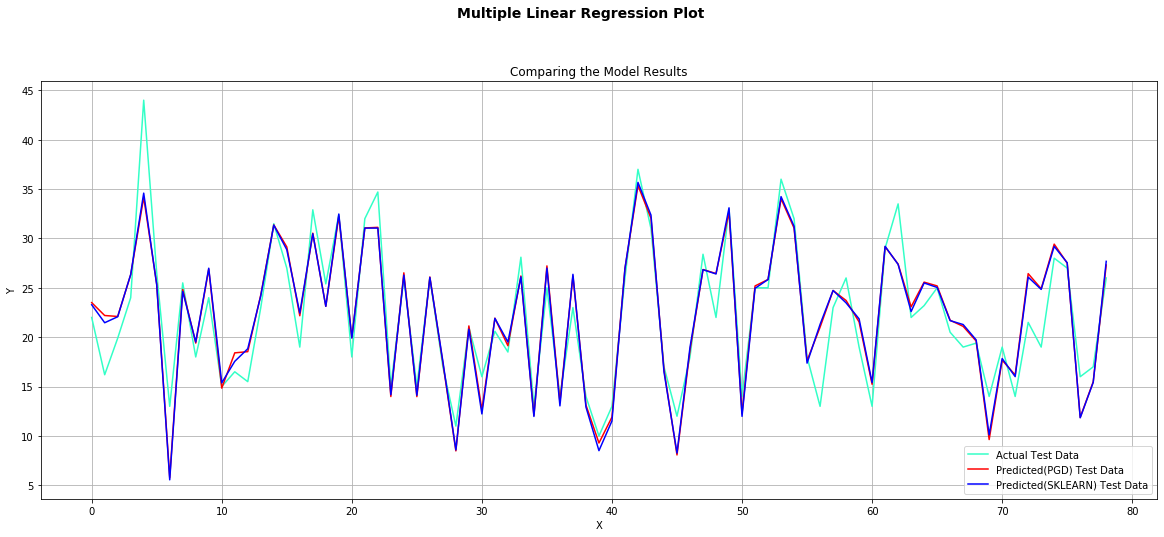

In [216]:
#Plotting all the datapoints

fig = plt.figure(figsize=(20,8))
fig.suptitle("Multiple Linear Regression Plot", fontsize=14, fontweight="bold")
ax = fig.add_subplot(111)
fig.subplots_adjust(top = 0.85)
ax.set_title("Comparing the Model Results")
ax.set_xlabel("X")
ax.set_ylabel("Y")
#ax.text(0, 500, "SSE : {} \nSST : {} \nR2   : {}".format(np.round(SSE,4),np.round( SST,4), np.round(R2,4)) , style = 'italic', bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.grid(True)
plt.plot(y_test , color='#33FFC7',label = 'Actual Test Data')
plt.plot(yPredicted_test, color='r', label = "Predicted(PGD) Test Data")
plt.plot(yPredicted_test3, color='b', label = "Predicted(SKLEARN) Test Data")
#plt.scatter(x_test, yPredicted_test, color='r', label = "Predicted Test Data")
#plt.scatter(xNew, yNew, color='b', label = "New Predicted Data")
#plt.plot(x_train, yPredicted, color = 'k', linewidth = 2, markersize = 12 , label = 'Regression Line using OLD')
#plt.plot(x_train, yPredicted2, color = 'r', linewidth = 2, markersize = 12 , label = 'Regression Line using Gradient Descent')
plt.legend(loc=4)
plt.show()